Ryan Jovanovic

Regression based on the data provided by EM-DAT

Emergency event database by Centre for Research on the Epidemiology of Disasters (CRED) and the World Health Organization (WHO)



In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Getting our data
data = pd.read_csv("emdat_public.csv",encoding='latin-1')
df = data.copy()

In [3]:
# Viewing our data
df

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,AID Contribution (US),Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs (US),"Reconstruction Costs, Adjusted (US)",Insured Damages (US),"Insured Damages, Adjusted (US)",Total Damages (US),"Total Damages, Adjusted (US)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,8.0,Richter,14,-91,20:20,NaN,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,843726.0,2.963048,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,2023-0095-ZWE,2023,95,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',Zimbabwe,ZWE,Eastern Africa,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2023,2.0,24.0,2023,3.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16767,2023-0466-SRB,2023,466,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Serbia,SRB,Southern Europe,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2023,7.0,21.0,2023,7.0,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16768,2023-0022-SRB,2023,22,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Serbia,SRB,Southern Europe,Europe,Sjenica and Brodarevo Novi Pazar Municipality;...,Heavy rainfall and river overflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,Trnavica River,2023,1.0,18.0,2023,1.0,20.0,2.0,NaN,210.0,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16769,2023-0460-SRB,2023,460,NaN,Natural,Meteorological,Storm,Convective storm,NaN,NaN,Serbia,SRB,Southern Europe,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2023,7.0,18.0,2023,7.0,19.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

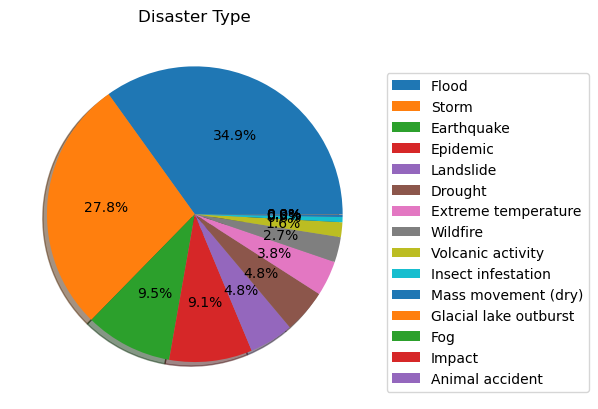

In [5]:
# Checking out the distribution of the natural disasters
data = df['Disaster Type'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True,legend=True, title='Title', ylabel='', labeldistance=None)
ax.set_title('Disaster Type')
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')
plt.show()

In [6]:
# Checking our columns
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution (US)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs (US)',
       'Reconstruction Costs, Adjusted (US)', 'Insured Damages (US)',
       'Insured Damages, Adjusted (US)', 'Total Damages (US)',
       'Total Damages, Adjusted (US)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [7]:
# Checking the values of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16771 entries, 0 to 16770
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Dis No                               16771 non-null  object 
 1   Year                                 16771 non-null  int64  
 2   Seq                                  16771 non-null  int64  
 3   Glide                                1755 non-null   object 
 4   Disaster Group                       16771 non-null  object 
 5   Disaster Subgroup                    16771 non-null  object 
 6   Disaster Type                        16771 non-null  object 
 7   Disaster Subtype                     13407 non-null  object 
 8   Disaster Subsubtype                  1128 non-null   object 
 9   Event Name                           3992 non-null   object 
 10  Country                              16771 non-null  object 
 11  ISO                         

We see that there is indeed many null values

In [8]:
# Creating a dataframe with the columns we want to test out
df1 = df[['Start Year', 'Start Month', 'Start Day','Disaster Type', 'Country','Region',
          'Continent','End Year','End Month','End Day','AID Contribution (US)',
          'Total Deaths','No Injured','No Affected','No Homeless',
          'Insured Damages, Adjusted (US)','Total Damages, Adjusted (US)']]

In [9]:
# Viewing our new dataframe, df1
df1

,Start Year,Start Month,Start Day,Disaster Type,Country,Region,Continent,End Year,End Month,End Day,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)"
0,1900,NaN,NaN,Drought,Cabo Verde,Western Africa,Africa,1900,NaN,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,Drought,India,Southern Asia,Asia,1900,NaN,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN
2,1902,4.0,18.0,Earthquake,Guatemala,Central America,Americas,1902,4.0,18.0,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0
3,1902,4.0,8.0,Volcanic activity,Guatemala,Central America,Americas,1902,4.0,8.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
4,1902,10.0,24.0,Volcanic activity,Guatemala,Central America,Americas,1902,10.0,24.0,NaN,6000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,2023,2.0,24.0,Storm,Zimbabwe,Eastern Africa,Africa,2023,3.0,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
16767,2023,7.0,21.0,Storm,Serbia,Southern Europe,Europe,2023,7.0,25.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
16768,2023,1.0,18.0,Flood,Serbia,Southern Europe,Europe,2023,1.0,20.0,NaN,2.0,NaN,210.0,NaN,NaN,NaN
16769,2023,7.0,18.0,Storm,Serbia,Southern Europe,Europe,2023,7.0,19.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN


In [10]:
# Checking the values of the months and days
print(df1['Start Month'].unique())
print(df1['Start Day'].unique())
print(df1['End Month'].unique())
print(df1['End Day'].unique())

[nan  4. 10. 11.  8.  1.  5.  9. 12.  6.  3.  7.  2.]
[nan 18.  8. 24. 29. 13.  4. 16. 31. 14. 21. 26. 15. 11. 12.  5. 30. 22.
 25. 23. 19. 27.  7.  3.  2. 10. 20.  1.  9. 28.  6. 17.]
[nan  4. 10. 11.  8.  1.  5.  9. 12.  6.  3.  7.  2.]
[nan 18.  8. 24. 29. 13.  4. 16. 31. 14. 21. 26. 15. 11. 12.  5. 30. 22.
 25. 23. 19. 27.  7.  3.  2. 10. 20.  1.  9. 28.  6. 17.]


In [11]:
# dropping any null values
df1 = df1.dropna(subset=['Start Month'])
df1 = df1.dropna(subset=['Start Day'])
df1 = df1.dropna(subset=['End Month'])
df1 = df1.dropna(subset=['End Day'])

In [12]:
# Checking our months and days 
print(df1['Start Month'].unique())
print(df1['Start Day'].unique())
print(df1['End Month'].unique())
print(df1['End Day'].unique())

[ 4. 10.  8.  1.  5.  9.  6. 11.  3.  7. 12.  2.]
[18.  8. 24. 29. 13.  4. 16. 31. 14. 21. 26. 15. 11. 12.  5. 30. 22. 25.
 23. 19. 27.  7.  3.  2. 10. 20.  1.  9. 28.  6. 17.]
[ 4. 10.  8.  1.  5.  9.  6. 11.  3.  7. 12.  2.]
[18.  8. 24. 29. 13.  4. 16. 31. 14. 21. 26. 15. 11. 12.  5. 30. 22. 25.
 23. 19. 27.  7.  3.  2. 10. 20.  1.  9. 28.  6. 17.]


In [13]:
# Changing our months into integers
df1['Start Month'] = df1['Start Month'].astype(int)
df1['End Month'] = df1['End Month'].astype(int)
# Creating a month name as a column
import calendar
df1['Month name'] = df1['Start Month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
# Creating a end date column
df1.rename(columns={'End Year': "Year","End Month": "Month", "End Day": "Day"}, inplace = True)
df1['End Date'] = pd.to_datetime(df1[['Year', 'Month', 'Day']])
df1 = df1.drop(['Year', 'Month','Day'], axis=1)
df1.head()

,Start Year,Start Month,Start Day,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,End Date
2,1902,4,18.0,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,1902-04-18
3,1902,4,8.0,Volcanic activity,Guatemala,Central America,Americas,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,Apr,1902-04-08
4,1902,10,24.0,Volcanic activity,Guatemala,Central America,Americas,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,Oct,1902-10-24
5,1903,4,29.0,Mass movement (dry),Canada,Northern America,Americas,NaN,76.0,23.0,NaN,NaN,NaN,NaN,Apr,1903-04-29
8,1905,8,13.0,Mass movement (dry),Canada,Northern America,Americas,NaN,18.0,18.0,NaN,NaN,NaN,NaN,Aug,1905-08-13


In [15]:
# shift column 'Name' to first position
first_column = df1.pop('End Date')
  
# insert column using insert(position,column_name,
# first_column) function
df1.insert(0, 'End Date', first_column)
df1.head()

,End Date,Start Year,Start Month,Start Day,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name
2,1902-04-18,1902,4,18.0,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr
3,1902-04-08,1902,4,8.0,Volcanic activity,Guatemala,Central America,Americas,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,Apr
4,1902-10-24,1902,10,24.0,Volcanic activity,Guatemala,Central America,Americas,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,Oct
5,1903-04-29,1903,4,29.0,Mass movement (dry),Canada,Northern America,Americas,NaN,76.0,23.0,NaN,NaN,NaN,NaN,Apr
8,1905-08-13,1905,8,13.0,Mass movement (dry),Canada,Northern America,Americas,NaN,18.0,18.0,NaN,NaN,NaN,NaN,Aug


In [16]:
# Creating a start date column
df1.rename(columns={"Start Year": "Year","Start Month": "Month", "Start Day": "Day"}, inplace = True)
df1['Start Date'] = pd.to_datetime(df1[['Year', 'Month', 'Day']])
df1 = df1.drop(['Year', 'Month','Day'], axis=1)
df1.head()

,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Start Date
2,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,1902-04-18
3,1902-04-08,Volcanic activity,Guatemala,Central America,Americas,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,Apr,1902-04-08
4,1902-10-24,Volcanic activity,Guatemala,Central America,Americas,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,Oct,1902-10-24
5,1903-04-29,Mass movement (dry),Canada,Northern America,Americas,NaN,76.0,23.0,NaN,NaN,NaN,NaN,Apr,1903-04-29
8,1905-08-13,Mass movement (dry),Canada,Northern America,Americas,NaN,18.0,18.0,NaN,NaN,NaN,NaN,Aug,1905-08-13


In [17]:
# shift column 'Name' to first position
first_column = df1.pop('Start Date')
  
# insert column using insert(position,column_name,
# first_column) function
df1.insert(0, 'Start Date', first_column)
df1.head()

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name
2,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr
3,1902-04-08,1902-04-08,Volcanic activity,Guatemala,Central America,Americas,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,Apr
4,1902-10-24,1902-10-24,Volcanic activity,Guatemala,Central America,Americas,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,Oct
5,1903-04-29,1903-04-29,Mass movement (dry),Canada,Northern America,Americas,NaN,76.0,23.0,NaN,NaN,NaN,NaN,Apr
8,1905-08-13,1905-08-13,Mass movement (dry),Canada,Northern America,Americas,NaN,18.0,18.0,NaN,NaN,NaN,NaN,Aug


In [18]:
# Calculating the duration of the natural disaster
df1['Duration'] = df1['End Date'] - df1['Start Date']
df1.head()

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration
2,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,0 days
3,1902-04-08,1902-04-08,Volcanic activity,Guatemala,Central America,Americas,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,Apr,0 days
4,1902-10-24,1902-10-24,Volcanic activity,Guatemala,Central America,Americas,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,Oct,0 days
5,1903-04-29,1903-04-29,Mass movement (dry),Canada,Northern America,Americas,NaN,76.0,23.0,NaN,NaN,NaN,NaN,Apr,0 days
8,1905-08-13,1905-08-13,Mass movement (dry),Canada,Northern America,Americas,NaN,18.0,18.0,NaN,NaN,NaN,NaN,Aug,0 days


In [19]:
df1

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration
2,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,0 days
3,1902-04-08,1902-04-08,Volcanic activity,Guatemala,Central America,Americas,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,Apr,0 days
4,1902-10-24,1902-10-24,Volcanic activity,Guatemala,Central America,Americas,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,Oct,0 days
5,1903-04-29,1903-04-29,Mass movement (dry),Canada,Northern America,Americas,NaN,76.0,23.0,NaN,NaN,NaN,NaN,Apr,0 days
8,1905-08-13,1905-08-13,Mass movement (dry),Canada,Northern America,Americas,NaN,18.0,18.0,NaN,NaN,NaN,NaN,Aug,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,2023-02-24,2023-03-08,Storm,Zimbabwe,Eastern Africa,Africa,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Feb,12 days
16767,2023-07-21,2023-07-25,Storm,Serbia,Southern Europe,Europe,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Jul,4 days
16768,2023-01-18,2023-01-20,Flood,Serbia,Southern Europe,Europe,NaN,2.0,NaN,210.0,NaN,NaN,NaN,Jan,2 days
16769,2023-07-18,2023-07-19,Storm,Serbia,Southern Europe,Europe,NaN,NaN,NaN,20.0,NaN,NaN,NaN,Jul,1 days


In [20]:
# Resetting our index
df1 = df1.reset_index(drop=True)
df1

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,0 days
1,1902-04-08,1902-04-08,Volcanic activity,Guatemala,Central America,Americas,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,Apr,0 days
2,1902-10-24,1902-10-24,Volcanic activity,Guatemala,Central America,Americas,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,Oct,0 days
3,1903-04-29,1903-04-29,Mass movement (dry),Canada,Northern America,Americas,NaN,76.0,23.0,NaN,NaN,NaN,NaN,Apr,0 days
4,1905-08-13,1905-08-13,Mass movement (dry),Canada,Northern America,Americas,NaN,18.0,18.0,NaN,NaN,NaN,NaN,Aug,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13032,2023-02-24,2023-03-08,Storm,Zimbabwe,Eastern Africa,Africa,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Feb,12 days
13033,2023-07-21,2023-07-25,Storm,Serbia,Southern Europe,Europe,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Jul,4 days
13034,2023-01-18,2023-01-20,Flood,Serbia,Southern Europe,Europe,NaN,2.0,NaN,210.0,NaN,NaN,NaN,Jan,2 days
13035,2023-07-18,2023-07-19,Storm,Serbia,Southern Europe,Europe,NaN,NaN,NaN,20.0,NaN,NaN,NaN,Jul,1 days


In [21]:
# Selecting 4 different types of natural disasters
disaster_list = ['Earthquake','Storm','Flood','Wildfire']
df2 = df1.loc[df1['Disaster Type'].isin(disaster_list)]
df2

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,0 days
5,1905-04-04,1905-04-04,Earthquake,India,Southern Asia,Asia,NaN,20000.0,NaN,NaN,NaN,NaN,812477.0,Apr,0 days
6,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,NaN,20000.0,NaN,NaN,NaN,NaN,3249907.0,Aug,0 days
7,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,NaN,400.0,NaN,NaN,NaN,NaN,NaN,Jan,0 days
8,1906-05-14,1906-05-14,Flood,Belgium,Western Europe,Europe,NaN,6.0,NaN,NaN,NaN,NaN,NaN,May,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13030,2023-02-07,2023-03-09,Flood,Zambia,Eastern Africa,Africa,NaN,NaN,NaN,154608.0,NaN,NaN,NaN,Feb,30 days
13032,2023-02-24,2023-03-08,Storm,Zimbabwe,Eastern Africa,Africa,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Feb,12 days
13033,2023-07-21,2023-07-25,Storm,Serbia,Southern Europe,Europe,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Jul,4 days
13034,2023-01-18,2023-01-20,Flood,Serbia,Southern Europe,Europe,NaN,2.0,NaN,210.0,NaN,NaN,NaN,Jan,2 days


In [22]:
# Resetting our index
df2.reset_index(drop=True)

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,0 days
1,1905-04-04,1905-04-04,Earthquake,India,Southern Asia,Asia,NaN,20000.0,NaN,NaN,NaN,NaN,812477.0,Apr,0 days
2,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,NaN,20000.0,NaN,NaN,NaN,NaN,3249907.0,Aug,0 days
3,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,NaN,400.0,NaN,NaN,NaN,NaN,NaN,Jan,0 days
4,1906-05-14,1906-05-14,Flood,Belgium,Western Europe,Europe,NaN,6.0,NaN,NaN,NaN,NaN,NaN,May,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,2023-02-07,2023-03-09,Flood,Zambia,Eastern Africa,Africa,NaN,NaN,NaN,154608.0,NaN,NaN,NaN,Feb,30 days
11000,2023-02-24,2023-03-08,Storm,Zimbabwe,Eastern Africa,Africa,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Feb,12 days
11001,2023-07-21,2023-07-25,Storm,Serbia,Southern Europe,Europe,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Jul,4 days
11002,2023-01-18,2023-01-20,Flood,Serbia,Southern Europe,Europe,NaN,2.0,NaN,210.0,NaN,NaN,NaN,Jan,2 days


In [23]:
# Checking the info on the dataframe,df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11004 entries, 0 to 13035
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Start Date                      11004 non-null  datetime64[ns] 
 1   End Date                        11004 non-null  datetime64[ns] 
 2   Disaster Type                   11004 non-null  object         
 3   Country                         11004 non-null  object         
 4   Region                          11004 non-null  object         
 5   Continent                       11004 non-null  object         
 6   AID Contribution (US)           621 non-null    float64        
 7   Total Deaths                    8131 non-null   float64        
 8   No Injured                      3433 non-null   float64        
 9   No Affected                     6717 non-null   float64        
 10  No Homeless                     2059 non-null   float64   

In [24]:
# Checking the unique features from Continent and Disaster Type
# We will make dataframe containing one of each features
print(df2['Continent'].unique())
print(df2['Disaster Type'].unique())

['Americas' 'Asia' 'Europe' 'Africa' 'Oceania']
['Earthquake' 'Flood' 'Storm' 'Wildfire']


In [25]:
# Printing out our time intervals
for i in range(0,3):
    start = 1900+i*45
    end = 1900+(i+1)*45
    print(start,end)

1900 1945
1945 1990
1990 2035


We have 5 Continents  and  4 disaster types  and 12 intervals of year_period.

Meaning we should have 240 different dataframes.

Ex: 
dataframe0 = Americas + Earthquake + (1900,1910)

dataframe1 = Americas + Earthquake + (1910,1920)

...

dataframe239 = Oceania + Wildfire + (2010,2020)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11004 entries, 0 to 13035
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Start Date                      11004 non-null  datetime64[ns] 
 1   End Date                        11004 non-null  datetime64[ns] 
 2   Disaster Type                   11004 non-null  object         
 3   Country                         11004 non-null  object         
 4   Region                          11004 non-null  object         
 5   Continent                       11004 non-null  object         
 6   AID Contribution (US)           621 non-null    float64        
 7   Total Deaths                    8131 non-null   float64        
 8   No Injured                      3433 non-null   float64        
 9   No Affected                     6717 non-null   float64        
 10  No Homeless                     2059 non-null   float64   

In [27]:
# Viewing our dataframe if we were to drop all null values
df_drop_null = df2.dropna()
df_drop_null

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration
2436,1993-05-05,1993-05-05,Flood,Chile,South America,Americas,232.0,109.0,58.0,1993.0,1225.0,68880.0,68880.0,May,0 days
3123,1992-03-13,1992-03-13,Earthquake,Turkey,Western Asia,Asia,11213.0,653.0,3850.0,250000.0,95000.0,22525.0,1564256.0,Mar,0 days
3375,1997-08-15,1997-08-21,Storm,China,Eastern Asia,Asia,253.0,140.0,3000.0,790000.0,44000.0,27348.0,4922655.0,Aug,6 days
3433,1998-07-01,1998-08-30,Flood,China,Eastern Asia,Asia,131738.0,3656.0,123000.0,223000000.0,15850000.0,540755.0,53860097.0,Jul,60 days
3558,1995-01-17,1995-01-17,Earthquake,Japan,Eastern Asia,Asia,13557.0,5297.0,34492.0,255843.0,251301.0,5761553.0,192051751.0,Jan,0 days
3790,1997-07-02,1997-07-24,Flood,Czech Republic (the),Eastern Europe,Europe,5046.0,29.0,2409.0,87725.0,11973.0,565194.0,3372930.0,Jul,22 days
4228,1997-11-02,1997-11-04,Storm,Viet Nam,South-Eastern Asia,Asia,10473.0,3682.0,857.0,697225.0,383045.0,9116.0,856907.0,Nov,2 days
4504,1999-01-25,1999-01-25,Earthquake,Colombia,South America,Americas,32129.0,1186.0,8563.0,745000.0,452370.0,175690.0,3263198.0,Jan,0 days
4510,1999-09-12,1999-10-29,Flood,Mexico,Central America,Americas,1583.0,636.0,60.0,530000.0,86000.0,96629.0,792887.0,Sep,47 days
4773,2001-01-26,2001-01-26,Earthquake,India,Southern Asia,Asia,118929.0,20005.0,166812.0,4365000.0,1790000.0,165279.0,4335281.0,Jan,0 days


In [28]:
# Creating an empty list that will contains our mini-dataframes
list_dataframe_v1 =[]

# Creating a function that will split our dataframe
# Through Continent, Disaster Type and time period
# It will take each new dataframe and replace the null values with its means
def data_selection(df):
    list_dataframe_v1 =[]
    
    for continent in df['Continent'].unique():
        for disaster in df['Disaster Type'].unique():
            df4 = df.loc[(df['Continent'] == continent) & (df['Disaster Type'] == disaster)]
            # interpolating all null values through a linear method
            df4.interpolate(method='linear',limit_direction='both',inplace=True, axis=0)
            # adding the dataframe into the 
            list_dataframe_v1.append(df4)
                
    return list_dataframe_v1

In [29]:
# Getting the year from Start Date
df2['Year'] = df2['Start Date'].dt.year

In [30]:
df2.head()

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,NaN,2000.0,NaN,NaN,NaN,NaN,843726.0,Apr,0 days,1902
5,1905-04-04,1905-04-04,Earthquake,India,Southern Asia,Asia,NaN,20000.0,NaN,NaN,NaN,NaN,812477.0,Apr,0 days,1905
6,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,NaN,20000.0,NaN,NaN,NaN,NaN,3249907.0,Aug,0 days,1906
7,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,NaN,400.0,NaN,NaN,NaN,NaN,NaN,Jan,0 days,1906
8,1906-05-14,1906-05-14,Flood,Belgium,Western Europe,Europe,NaN,6.0,NaN,NaN,NaN,NaN,NaN,May,0 days,1906


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11004 entries, 0 to 13035
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Start Date                      11004 non-null  datetime64[ns] 
 1   End Date                        11004 non-null  datetime64[ns] 
 2   Disaster Type                   11004 non-null  object         
 3   Country                         11004 non-null  object         
 4   Region                          11004 non-null  object         
 5   Continent                       11004 non-null  object         
 6   AID Contribution (US)           621 non-null    float64        
 7   Total Deaths                    8131 non-null   float64        
 8   No Injured                      3433 non-null   float64        
 9   No Affected                     6717 non-null   float64        
 10  No Homeless                     2059 non-null   float64   

In [32]:
# Changing datetime to string
# since we will interpolate our columns
df2['End Date']= df2['End Date'].dt.strftime('%Y-%m-%d')
df2['Start Date']= df2['Start Date'].dt.strftime('%Y-%m-%d')


# Changing the Duration from time values into an integer
df2['Duration'] = df2['Duration'].dt.days
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11004 entries, 0 to 13035
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Start Date                      11004 non-null  object 
 1   End Date                        11004 non-null  object 
 2   Disaster Type                   11004 non-null  object 
 3   Country                         11004 non-null  object 
 4   Region                          11004 non-null  object 
 5   Continent                       11004 non-null  object 
 6   AID Contribution (US)           621 non-null    float64
 7   Total Deaths                    8131 non-null   float64
 8   No Injured                      3433 non-null   float64
 9   No Affected                     6717 non-null   float64
 10  No Homeless                     2059 non-null   float64
 11  Insured Damages, Adjusted (US)  1059 non-null   float64
 12  Total Damages, Adjusted (US)    

In [33]:
# Splitting our dataframe
DF = data_selection(df2)

In [34]:
# Checking the amount of dataframes we made through the split
# verifying to see if we really have 240 dataframes
len(DF)

20

In [35]:
# Getting our first dataframe
# it should have Americas + Earthquake + 1900-1925
DF0= DF[0]
DF0

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,Apr,0,1902
6,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,Aug,0,1906
7,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,Jan,0,1906
16,1910-04-13,1910-04-13,Earthquake,Costa Rica,Central America,Americas,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,Apr,0,1910
25,1917-12-25,1917-12-25,Earthquake,Guatemala,Central America,Americas,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,Dec,0,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12740,2022-09-19,2022-09-19,Earthquake,Mexico,Central America,Americas,44992.0,2.0,9.0,15453.0,2424.0,452306.0,2.500000e+04,Sep,0,2022
12812,2022-09-22,2022-09-22,Earthquake,Mexico,Central America,Americas,44992.0,3.0,5.0,18000.0,2424.0,452306.0,1.000000e+05,Sep,0,2022
12832,2022-07-12,2022-07-12,Earthquake,Peru,South America,Americas,44992.0,2.5,2.0,300.0,2424.0,452306.0,1.750000e+05,Jul,0,2022
12873,2022-12-20,2022-12-20,Earthquake,United States of America (the),Northern America,Americas,44992.0,2.0,12.0,220.0,2424.0,452306.0,2.500000e+05,Dec,0,2022


In [36]:
# Checking to see if our prediction was true about the first dataframe
print(DF0['Disaster Type'].unique())
print(DF0['Continent'].unique())
print(DF0['Year'].unique())

['Earthquake']
['Americas']
[1902 1906 1910 1917 1922 1924 1928 1939 1942 1943 1944 1946 1949 1950
 1952 1953 1960 1962 1965 1966 1967 1970 1971 1973 1976 1977 1907 1913
 1915 1918 1925 1931 1933 1940 1947 1951 1957 1958 1959 1964 1968 1969
 1972 1974 1979 1980 1981 1982 1983 1985 1986 1987 1988 1978 1990 1991
 1992 1993 1994 1989 1995 1997 1998 1996 1999 2000 2001 2002 2003 2004
 2005 2007 2006 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2019
 2018 1920 1923 1936 1955 2021 1911 1914 1930 1932 1937 2020 2022 1975
 2023]


In [37]:
# Combining our multiple dataframes into one
result = pd.concat(DF)

# Resetting our index
result = result.reset_index(drop=True)
result

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,150.0,2000.0,58500.0,120000.000000,40000.0,5849833.0,8.437260e+05,Apr,0,1902
1,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,150.0,20000.0,58500.0,120000.000000,40000.0,5849833.0,3.249907e+06,Aug,0,1906
2,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,150.0,400.0,58500.0,120000.000000,40000.0,5849833.0,5.544612e+06,Jan,0,1906
3,1910-04-13,1910-04-13,Earthquake,Costa Rica,Central America,Americas,150.0,1750.0,58500.0,120000.000000,40000.0,5849833.0,7.839318e+06,Apr,0,1910
4,1917-12-25,1917-12-25,Earthquake,Guatemala,Central America,Americas,150.0,2650.0,58500.0,120000.000000,40000.0,5849833.0,1.013402e+07,Dec,0,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,2016-01-05,2016-01-10,Wildfire,Australia,Australia and New Zealand,Oceania,NaN,2.0,16.0,164.571429,540.0,60968.0,1.341290e+05,Jan,5,2016
11000,2017-02-09,2017-02-13,Wildfire,Australia,Australia and New Zealand,Oceania,NaN,2.0,2.0,27.000000,114.0,17909.0,2.387900e+04,Feb,4,2017
11001,2019-03-01,2019-03-20,Wildfire,Australia,Australia and New Zealand,Oceania,NaN,2.0,2.0,600.000000,27.0,33795.0,7.674100e+04,Mar,19,2019
11002,2021-02-01,2021-02-07,Wildfire,Australia,Australia and New Zealand,Oceania,NaN,2.0,2.0,397.500000,243.0,49681.0,1.296030e+05,Feb,6,2021


In [38]:
# Checking our null values
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Start Date                      11004 non-null  object 
 1   End Date                        11004 non-null  object 
 2   Disaster Type                   11004 non-null  object 
 3   Country                         11004 non-null  object 
 4   Region                          11004 non-null  object 
 5   Continent                       11004 non-null  object 
 6   AID Contribution (US)           10976 non-null  float64
 7   Total Deaths                    11004 non-null  float64
 8   No Injured                      11004 non-null  float64
 9   No Affected                     11004 non-null  float64
 10  No Homeless                     11004 non-null  float64
 11  Insured Damages, Adjusted (US)  10958 non-null  float64
 12  Total Damages, Adjusted (US)    

In [39]:
# Lets see what happens if we were to drop all null values
result_no_null = result.dropna()
result_no_null

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,Apr,0,1902
1,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,Aug,0,1906
2,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,Jan,0,1906
3,1910-04-13,1910-04-13,Earthquake,Costa Rica,Central America,Americas,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,Apr,0,1910
4,1917-12-25,1917-12-25,Earthquake,Guatemala,Central America,Americas,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,Dec,0,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,2023-02-11,2023-02-13,Storm,New Zealand,Australia and New Zealand,Oceania,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,Feb,2,2023
10972,2023-04-09,2023-04-10,Storm,New Zealand,Australia and New Zealand,Oceania,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,Apr,1,2023
10973,2023-05-20,2023-05-20,Storm,Guam,Micronesia,Oceania,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,May,0,2023
10974,2023-02-28,2023-03-03,Storm,Vanuatu,Melanesia,Oceania,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,Feb,3,2023


In [40]:
# Resetting our index
df_final = result_no_null.reset_index(drop=True)
df_final

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,Apr,0,1902
1,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,Aug,0,1906
2,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,Jan,0,1906
3,1910-04-13,1910-04-13,Earthquake,Costa Rica,Central America,Americas,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,Apr,0,1910
4,1917-12-25,1917-12-25,Earthquake,Guatemala,Central America,Americas,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,Dec,0,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10925,2023-02-11,2023-02-13,Storm,New Zealand,Australia and New Zealand,Oceania,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,Feb,2,2023
10926,2023-04-09,2023-04-10,Storm,New Zealand,Australia and New Zealand,Oceania,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,Apr,1,2023
10927,2023-05-20,2023-05-20,Storm,Guam,Micronesia,Oceania,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,May,0,2023
10928,2023-02-28,2023-03-03,Storm,Vanuatu,Melanesia,Oceania,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,Feb,3,2023


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10930 entries, 0 to 10929
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Start Date                      10930 non-null  object 
 1   End Date                        10930 non-null  object 
 2   Disaster Type                   10930 non-null  object 
 3   Country                         10930 non-null  object 
 4   Region                          10930 non-null  object 
 5   Continent                       10930 non-null  object 
 6   AID Contribution (US)           10930 non-null  float64
 7   Total Deaths                    10930 non-null  float64
 8   No Injured                      10930 non-null  float64
 9   No Affected                     10930 non-null  float64
 10  No Homeless                     10930 non-null  float64
 11  Insured Damages, Adjusted (US)  10930 non-null  float64
 12  Total Damages, Adjusted (US)    

In [42]:
# Turning our Dates back into datetime
df_final['Start Date']= pd.to_datetime(df_final['Start Date'])
df_final['End Date']= pd.to_datetime(df_final['End Date'])

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10930 entries, 0 to 10929
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Start Date                      10930 non-null  datetime64[ns]
 1   End Date                        10930 non-null  datetime64[ns]
 2   Disaster Type                   10930 non-null  object        
 3   Country                         10930 non-null  object        
 4   Region                          10930 non-null  object        
 5   Continent                       10930 non-null  object        
 6   AID Contribution (US)           10930 non-null  float64       
 7   Total Deaths                    10930 non-null  float64       
 8   No Injured                      10930 non-null  float64       
 9   No Affected                     10930 non-null  float64       
 10  No Homeless                     10930 non-null  float64       
 11  In

In [44]:
df_final.describe()

,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Duration,Year
count,1.093000e+04,10930.000000,10930.000000,1.093000e+04,1.093000e+04,1.093000e+04,1.093000e+04,10930.000000,10930.000000
mean,3.284087e+04,417.387054,1054.854209,6.650266e+05,6.084040e+04,1.014419e+06,1.190613e+06,4.927996,2000.037237
std,1.453904e+05,6230.725130,10919.164804,5.971940e+06,3.512420e+05,3.696219e+06,5.997426e+06,13.983063,20.005100
min,1.000000e+00,1.000000,1.000000,5.000000e+00,5.000000e+00,4.600000e+01,2.000000e+00,0.000000,1900.000000
25%,1.800000e+02,4.000000,16.000000,2.056423e+03,7.215152e+02,9.173026e+04,3.098950e+04,0.000000,1993.000000
50%,9.052273e+02,12.500000,50.000000,1.431439e+04,3.750000e+03,2.676855e+05,1.499905e+05,1.000000,2004.000000
75%,5.108849e+03,39.000000,162.475000,1.000000e+05,2.300000e+04,6.529322e+05,6.190482e+05,4.000000,2014.000000
max,3.518530e+06,300000.000000,600000.000000,2.230000e+08,1.585000e+07,8.991316e+07,2.732184e+08,369.000000,2023.000000


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

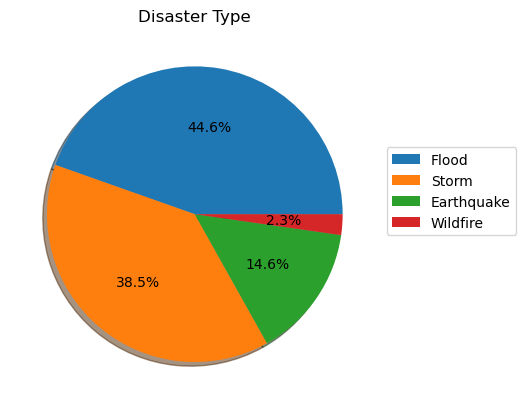

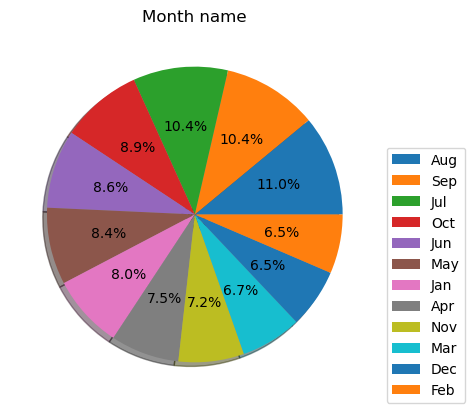

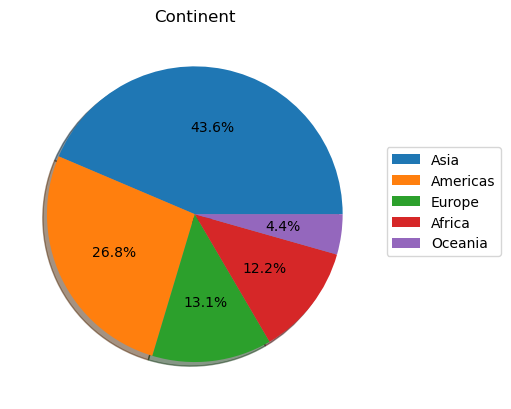

In [46]:
# Creating pie chart 
# based on Disaster Type, Month and Continent
feat_list = ['Disaster Type', 'Month name','Continent']

for feat in feat_list:
    data = df_final[feat].value_counts()
    ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True,
                legend=True, title='Title', 
               ylabel='', labeldistance=None)
    ax.set_title(feat)
    ax.legend(bbox_to_anchor=(1, 0.7), loc='upper left')
    plt.show()

### Observation
We see that the representation of wildfire in the data frame is only 0.5%

It is in our best interest to drop Wildfire from the model.

However we will consider Wildfire in our future evaluations (NLP and CNN).

Also we notice there is a good distribution for the months.

Also we see that Asia and Americas have a very strong representation.

This makes sense since they are very large continents.

As well as having many fault lines & tectonic plates.

In [47]:
# Dropping rows containing the Disaster Type Wilfire and resetting our index
result = df_final.drop(df_final[df_final['Disaster Type'] == 'Wildfire'].index)
result['Duration'] +=1
result = result.reset_index(drop=True)
result

,Start Date,End Date,Disaster Type,Country,Region,Continent,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,Americas,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,Apr,1,1902
1,1906-08-16,1906-08-16,Earthquake,Chile,South America,Americas,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,Aug,1,1906
2,1906-01-31,1906-01-31,Earthquake,Colombia,South America,Americas,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,Jan,1,1906
3,1910-04-13,1910-04-13,Earthquake,Costa Rica,Central America,Americas,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,Apr,1,1910
4,1917-12-25,1917-12-25,Earthquake,Guatemala,Central America,Americas,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,Dec,1,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2023-02-11,2023-02-13,Storm,New Zealand,Australia and New Zealand,Oceania,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,Feb,3,2023
10679,2023-04-09,2023-04-10,Storm,New Zealand,Australia and New Zealand,Oceania,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,Apr,2,2023
10680,2023-05-20,2023-05-20,Storm,Guam,Micronesia,Oceania,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,May,1,2023
10681,2023-02-28,2023-03-03,Storm,Vanuatu,Melanesia,Oceania,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,Feb,4,2023


In [48]:
# Checking our Disaster Type
result['Disaster Type'].unique()

array(['Earthquake', 'Flood', 'Storm'], dtype=object)

In [49]:
# Checking our numerical columns info
result.describe()

,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Duration,Year
count,1.068300e+04,10683.000000,10683.000000,1.068300e+04,1.068300e+04,1.068300e+04,1.068300e+04,10683.000000,10683.000000
mean,3.358037e+04,426.596274,1077.354488,6.798338e+05,6.221387e+04,1.007817e+06,1.197010e+06,5.805953,1999.969110
std,1.469794e+05,6302.042520,11043.610918,6.039776e+06,3.551620e+05,3.721883e+06,6.058344e+06,13.540714,20.066986
min,1.000000e+00,1.000000,1.000000,5.000000e+00,5.000000e+00,4.600000e+01,2.000000e+00,1.000000,1900.000000
25%,1.800000e+02,4.000000,16.115556,2.242500e+03,7.730041e+02,9.212734e+04,3.045100e+04,1.000000,1992.000000
50%,9.228571e+02,13.000000,50.000000,1.500000e+04,4.000000e+03,2.680075e+05,1.456667e+05,2.000000,2004.000000
75%,5.455040e+03,39.666667,165.403509,1.020000e+05,2.421880e+04,6.425685e+05,6.185950e+05,5.000000,2014.000000
max,3.518530e+06,300000.000000,600000.000000,2.230000e+08,1.585000e+07,8.991316e+07,2.732184e+08,370.000000,2023.000000


In [50]:
# Creating list of features  for future plotting
disaster_list = result['Disaster Type'].unique()
region_list = result['Region'].unique()
continent_list = result['Continent'].unique()
month_list = result['Month name'].unique()
y_list = ['AID Contribution (US)','Total Deaths','No Injured','No Affected','No Homeless',
         'Insured Damages, Adjusted (US)','Total Damages, Adjusted (US)']

### Plotting Bar Graphs

where x is our disaster types

where y is our numerical valued columns

we also have the continents as the hue

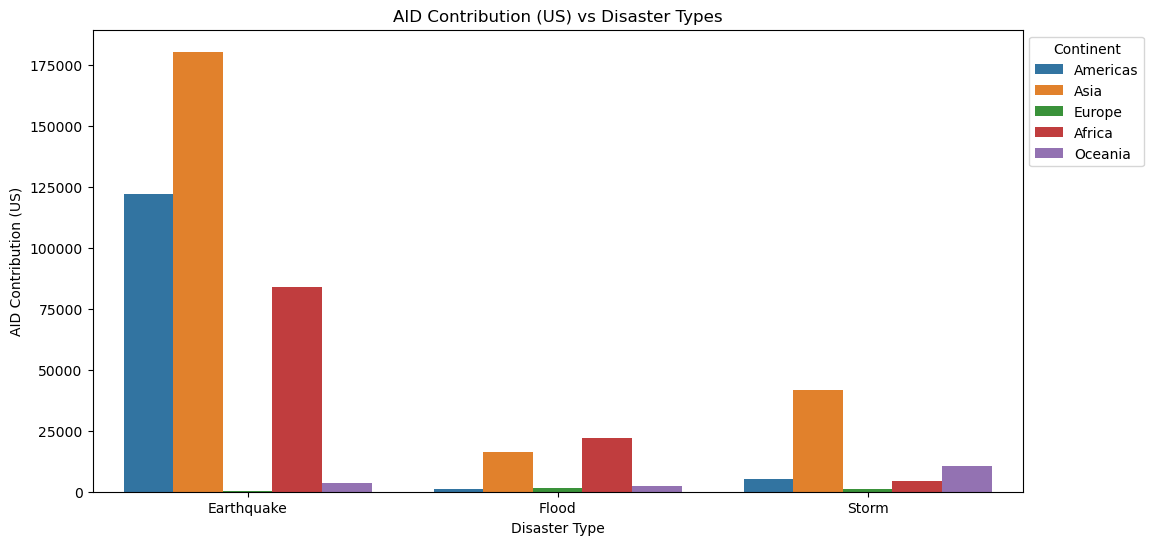

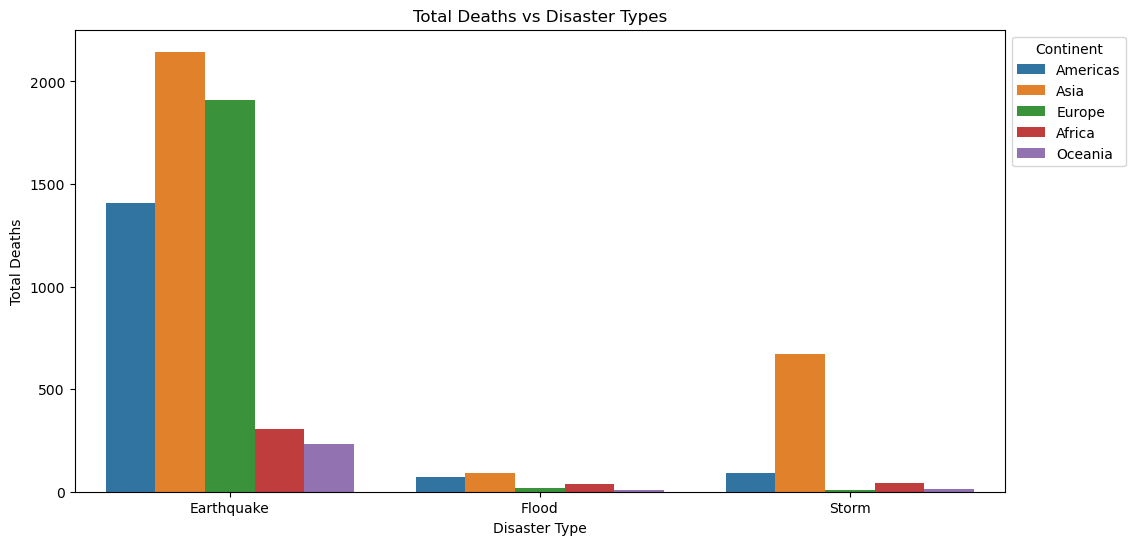

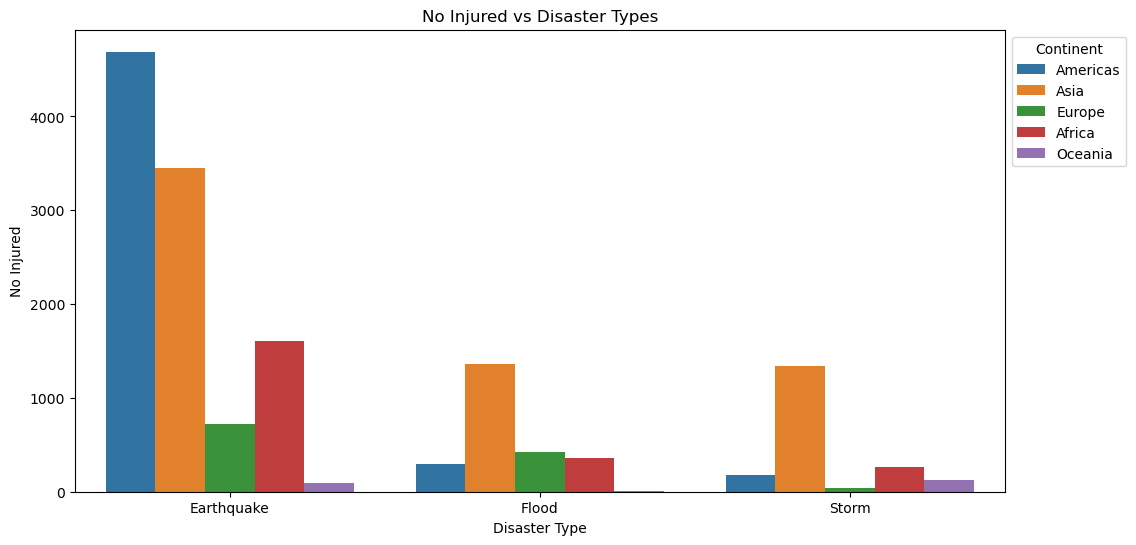

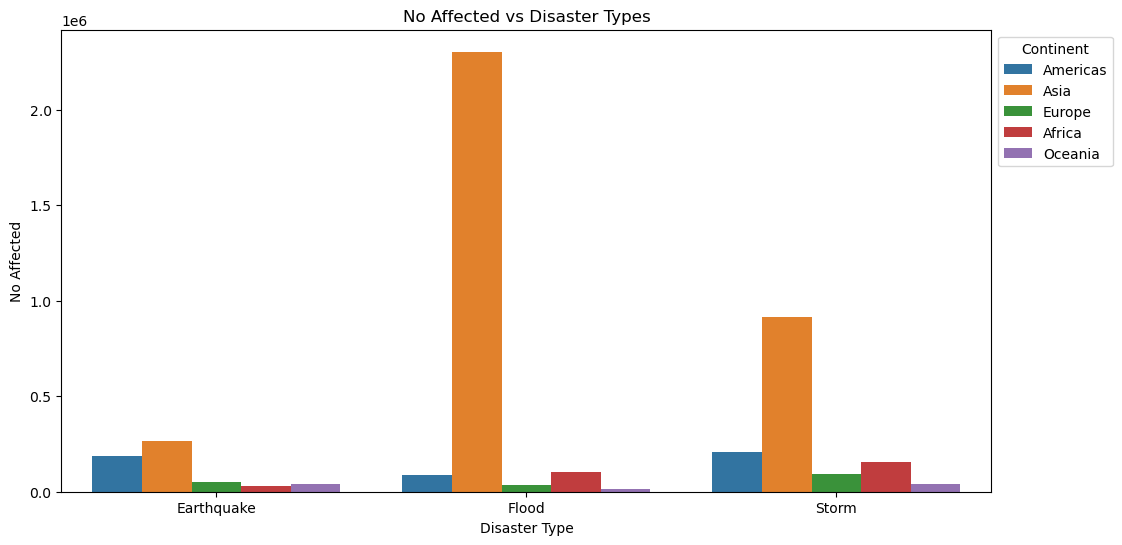

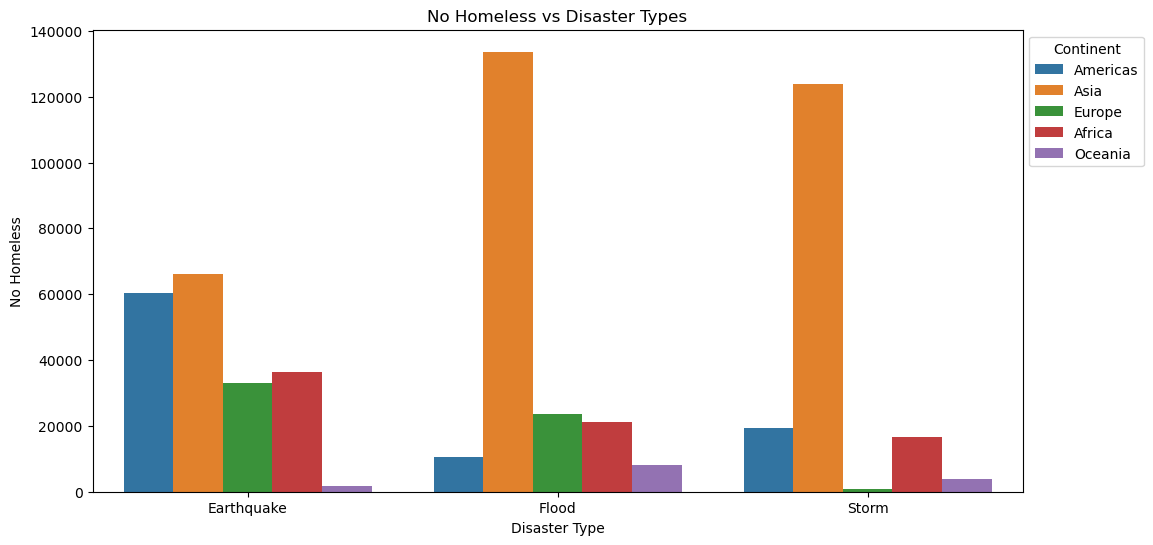

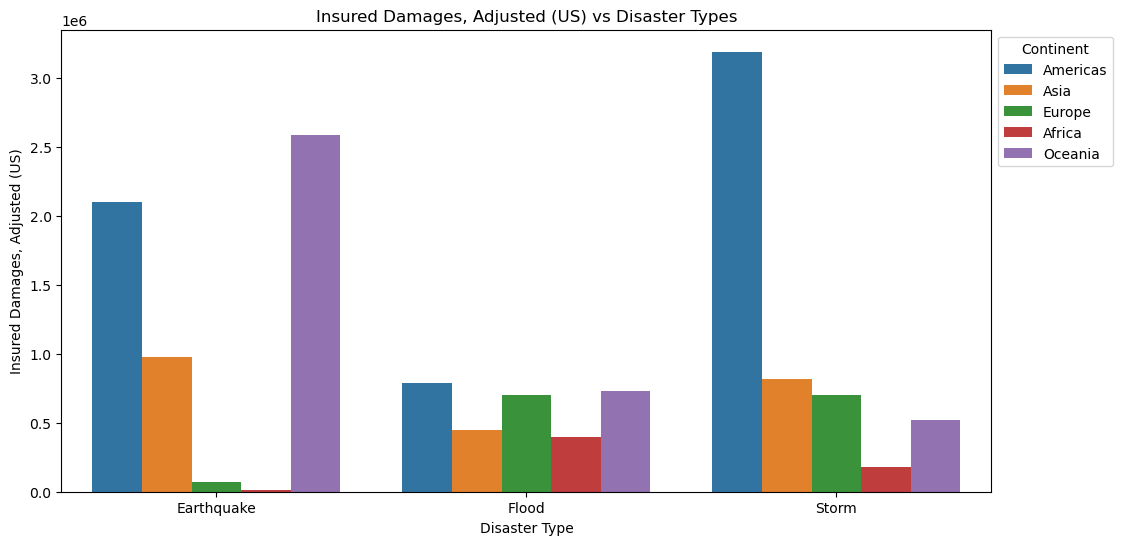

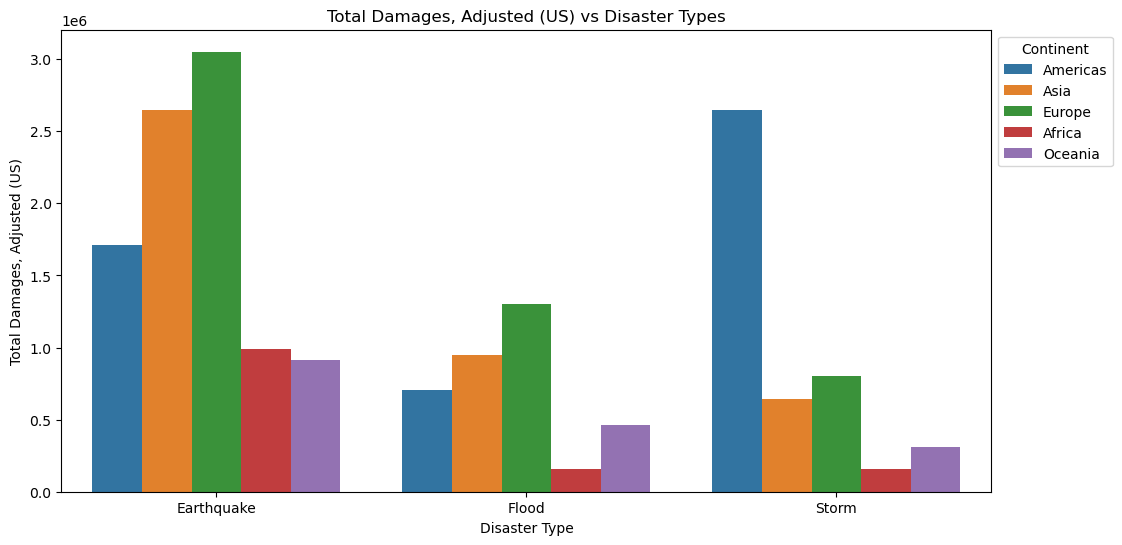

In [51]:
# Creating barplots
# where x is the disaster type
# y will be our numerical values
# we will also split the barplot into Continent categories with the use of hue


for y in y_list:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.barplot(data=result, x="Disaster Type", y=y , hue="Continent",ci = None)
    ax.set_title(y + ' vs Disaster Types')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Beware! 

Putting '#' to not execute the following plots
Already ran
Took pictures of the graphs
Takes too long to run afterwards

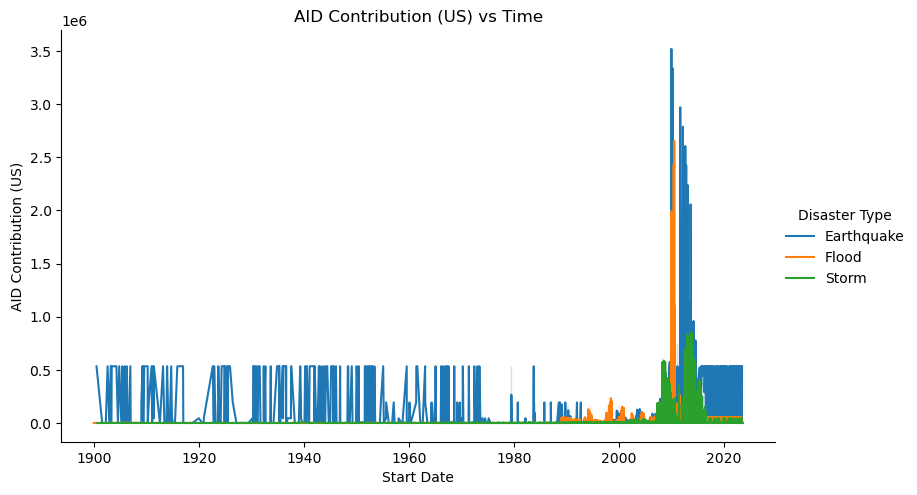

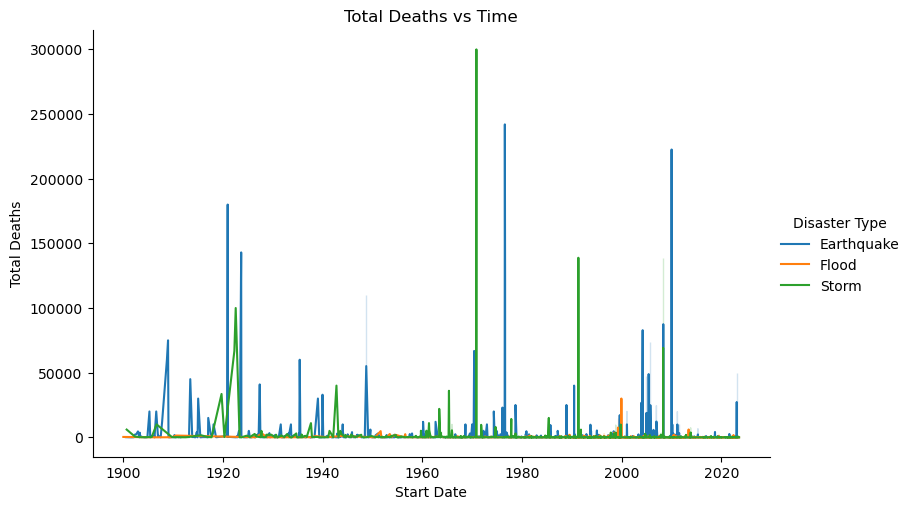

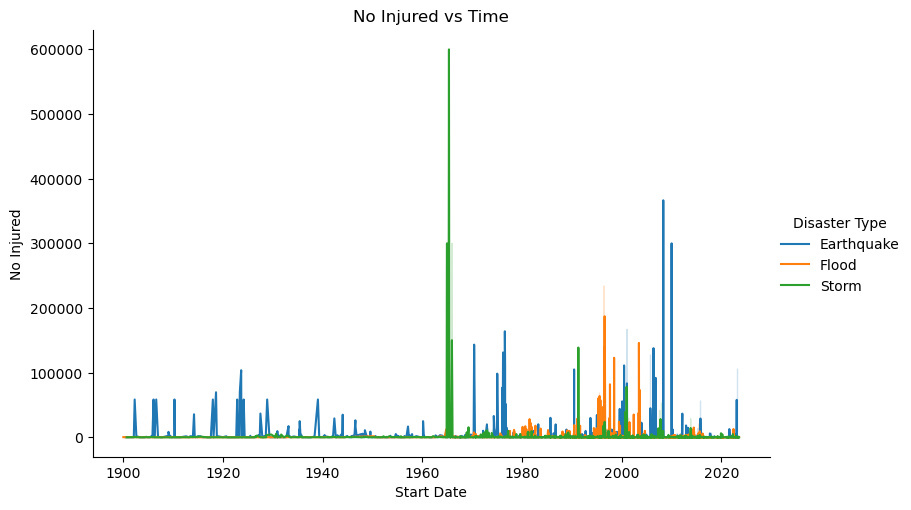

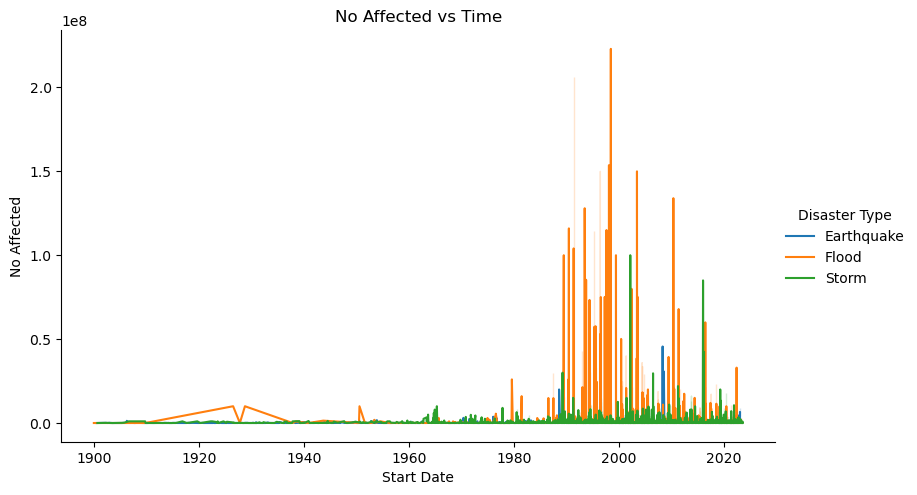

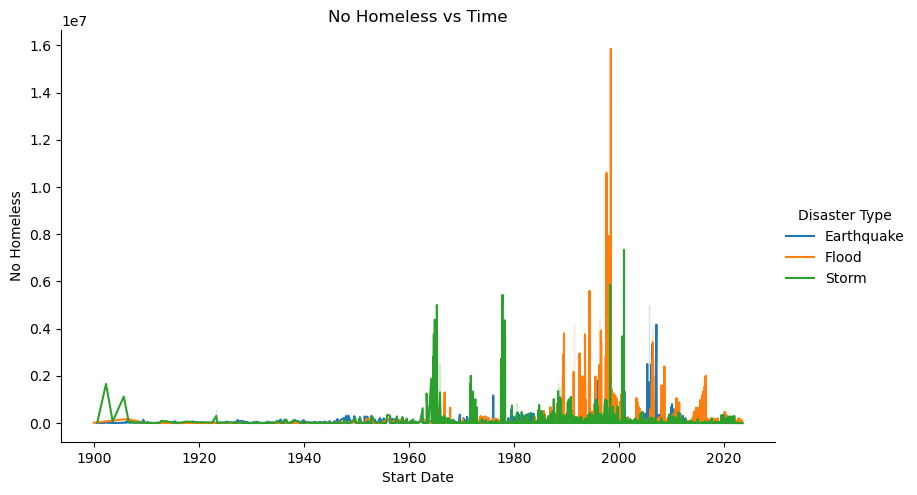

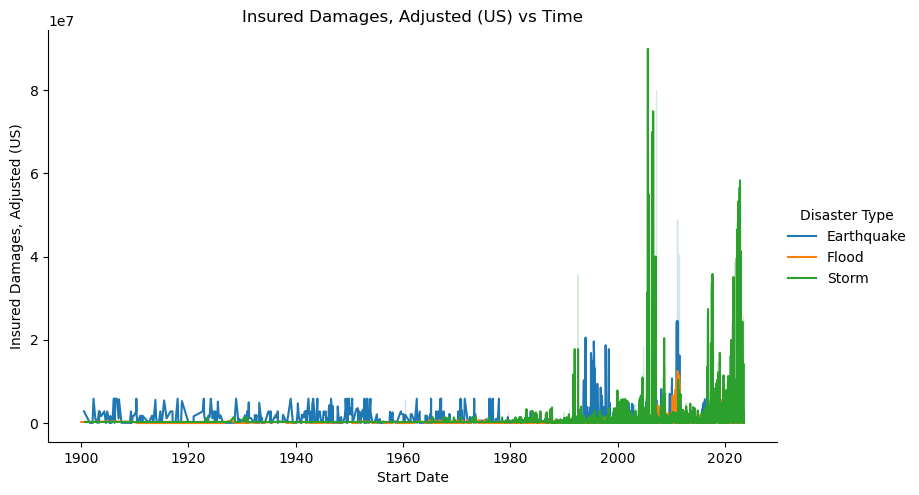

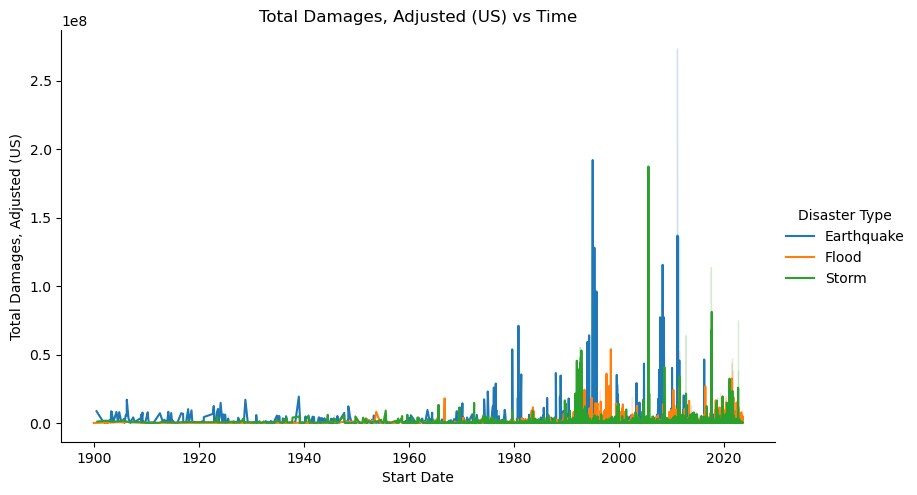

In [52]:
# Making RelPlot  
# where x is the date
# where y are the numerical values
# hue is the disaster type
for y in y_list:
    sns.relplot(data=result, kind="line",x="Start Date", y=y,hue = 'Disaster Type',height=5, aspect=1.6).set(
    title= y + " vs Time")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.5))
    plt.show()

In [53]:
# Checking the info on the data frame result
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Start Date                      10683 non-null  datetime64[ns]
 1   End Date                        10683 non-null  datetime64[ns]
 2   Disaster Type                   10683 non-null  object        
 3   Country                         10683 non-null  object        
 4   Region                          10683 non-null  object        
 5   Continent                       10683 non-null  object        
 6   AID Contribution (US)           10683 non-null  float64       
 7   Total Deaths                    10683 non-null  float64       
 8   No Injured                      10683 non-null  float64       
 9   No Affected                     10683 non-null  float64       
 10  No Homeless                     10683 non-null  float64       
 11  In

In [54]:
# Checking our numerical info
result.describe()

,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Duration,Year
count,1.068300e+04,10683.000000,10683.000000,1.068300e+04,1.068300e+04,1.068300e+04,1.068300e+04,10683.000000,10683.000000
mean,3.358037e+04,426.596274,1077.354488,6.798338e+05,6.221387e+04,1.007817e+06,1.197010e+06,5.805953,1999.969110
std,1.469794e+05,6302.042520,11043.610918,6.039776e+06,3.551620e+05,3.721883e+06,6.058344e+06,13.540714,20.066986
min,1.000000e+00,1.000000,1.000000,5.000000e+00,5.000000e+00,4.600000e+01,2.000000e+00,1.000000,1900.000000
25%,1.800000e+02,4.000000,16.115556,2.242500e+03,7.730041e+02,9.212734e+04,3.045100e+04,1.000000,1992.000000
50%,9.228571e+02,13.000000,50.000000,1.500000e+04,4.000000e+03,2.680075e+05,1.456667e+05,2.000000,2004.000000
75%,5.455040e+03,39.666667,165.403509,1.020000e+05,2.421880e+04,6.425685e+05,6.185950e+05,5.000000,2014.000000
max,3.518530e+06,300000.000000,600000.000000,2.230000e+08,1.585000e+07,8.991316e+07,2.732184e+08,370.000000,2023.000000


## Time to set up for our  Models


## Regression

#### Multiple Regression (OLS)
Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X).

By using a best fit straight line (also known as regression line).

In this technique, the dependent variable is continuous.

While the independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Multiple linear regression should be used when multiple independent variables determine the outcome of a single dependent variable. 

This is often the case when forecasting more complex relationships.


##### WLS
WLS, weighted least squares reflects the behavior of the random errors in the model.

It can be used with functions that are either linear or nonlinear in the parameters.

The main advantage that weighted least squares enjoys over other methods is the ability to handle regression situations in which the data points are of varying quality.

Weighted least squares regression, like the other least squares methods, is also sensitive to the effects of outliers.

##### Multinomial Logistic Regression

It is intended to be used when you have a multiclass outcome variable.

To be used when the outcome variable being predicted is nominal and has more than two categories.

This model can be used with any number of independent variables that are categorical or continuous.

This type of regression is similar to logistic regression, but it is more general because the dependent variable is not restricted to two categories.



### Implementing our Linear Regression

In [55]:
# Creating dummy variables
result_new = pd.get_dummies(data=result, columns=['Continent','Disaster Type'])
result_new

,Start Date,End Date,Country,Region,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm
0,1902-04-18,1902-04-18,Guatemala,Central America,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,Apr,1,1902,0,1,0,0,0,1,0,0
1,1906-08-16,1906-08-16,Chile,South America,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,Aug,1,1906,0,1,0,0,0,1,0,0
2,1906-01-31,1906-01-31,Colombia,South America,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,Jan,1,1906,0,1,0,0,0,1,0,0
3,1910-04-13,1910-04-13,Costa Rica,Central America,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,Apr,1,1910,0,1,0,0,0,1,0,0
4,1917-12-25,1917-12-25,Guatemala,Central America,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,Dec,1,1917,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2023-02-11,2023-02-13,New Zealand,Australia and New Zealand,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,Feb,3,2023,0,0,0,0,1,0,0,1
10679,2023-04-09,2023-04-10,New Zealand,Australia and New Zealand,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,Apr,2,2023,0,0,0,0,1,0,0,1
10680,2023-05-20,2023-05-20,Guam,Micronesia,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,May,1,2023,0,0,0,0,1,0,0,1
10681,2023-02-28,2023-03-03,Vanuatu,Melanesia,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,Feb,4,2023,0,0,0,0,1,0,0,1


In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Removing unwanted columns
df_reg = result_new.drop(['Start Date','End Date','Country',
                          'Region','Month name', 'Year'], axis=1)
df_reg

,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Duration,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm
0,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,1,0,1,0,0,0,1,0,0
1,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,1,0,1,0,0,0,1,0,0
2,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,1,0,1,0,0,0,1,0,0
3,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,1,0,1,0,0,0,1,0,0
4,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,3,0,0,0,0,1,0,0,1
10679,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,2,0,0,0,0,1,0,0,1
10680,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,1,0,0,0,0,1,0,0,1
10681,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,4,0,0,0,0,1,0,0,1


In [59]:
# Set up the X variables
X_lin = df_reg.drop(['Insured Damages, Adjusted (US)', 'Total Damages, Adjusted (US)'], axis=1)
X_lin = sm.add_constant(X_lin)

# Set up y1 to be the insured damages
y_ins_dam = df_reg['Insured Damages, Adjusted (US)']

# Set up the y2 to be the total damages
y_tot_dam = df_reg['Total Damages, Adjusted (US)']

In [60]:
# Viewing our independent variable, X
X_lin

,const,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,Duration,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm
0,1.0,150.0,2000.0,58500.0,120000.0,40000.0,1,0,1,0,0,0,1,0,0
1,1.0,150.0,20000.0,58500.0,120000.0,40000.0,1,0,1,0,0,0,1,0,0
2,1.0,150.0,400.0,58500.0,120000.0,40000.0,1,0,1,0,0,0,1,0,0
3,1.0,150.0,1750.0,58500.0,120000.0,40000.0,1,0,1,0,0,0,1,0,0
4,1.0,150.0,2650.0,58500.0,120000.0,40000.0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,44127.0,11.0,120.0,10500.0,12.0,3,0,0,0,0,1,0,0,1
10679,1.0,44127.0,6.5,120.0,303.0,12.0,2,0,0,0,0,1,0,0,1
10680,1.0,44127.0,2.0,120.0,125824.5,12.0,1,0,0,0,0,1,0,0,1
10681,1.0,44127.0,2.0,120.0,251346.0,12.0,4,0,0,0,0,1,0,0,1


### OLS for Insured Damages

In [61]:
# Create the OLS model 
model_OLS_v1 = sm.OLS(y_ins_dam,X_lin)

# Fit the model to the data
results_OLS_v1 = model_OLS_v1.fit()

# Print summary statistics of the model's performance
print(results_OLS_v1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Insured Damages, Adjusted (US)   R-squared:                       0.042
Model:                                        OLS   Adj. R-squared:                  0.041
Method:                             Least Squares   F-statistic:                     39.17
Date:                            Sun, 03 Sep 2023   Prob (F-statistic):           6.49e-91
Time:                                    16:10:32   Log-Likelihood:            -1.7656e+05
No. Observations:                           10683   AIC:                         3.531e+05
Df Residuals:                               10670   BIC:                         3.532e+05
Df Model:                                      12                                         
Covariance Type:                        nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.97

### WLS for Insured Damages

In [62]:
# define weights to use
# we used the first  OLS model
wt = 1 / smf.ols('results_OLS_v1.resid.abs() ~ results_OLS_v1.fittedvalues', data=df_reg).fit().fittedvalues**2


#fit weighted least squares regression model
results_WLS_v1 = sm.WLS(y_ins_dam, X_lin, weights=wt).fit()

#view summary of weighted least squares regression model
print(results_WLS_v1.summary())

                                  WLS Regression Results                                  
Dep. Variable:     Insured Damages, Adjusted (US)   R-squared:                       0.603
Model:                                        WLS   Adj. R-squared:                  0.602
Method:                             Least Squares   F-statistic:                     1349.
Date:                            Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                                    16:10:32   Log-Likelihood:            -1.9254e+05
No. Observations:                           10683   AIC:                         3.851e+05
Df Residuals:                               10670   BIC:                         3.852e+05
Df Model:                                      12                                         
Covariance Type:                        nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.97

### OLS for Total Damages

In [63]:
# Create the OLS model 
model_OLS_v1 = sm.OLS(y_tot_dam,X_lin)

# Fit the model to the data
results_OLS_v1 = model_OLS_v1.fit()

# Print summary statistics of the model's performance
print(results_OLS_v1.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Total Damages, Adjusted (US)   R-squared:                       0.050
Model:                                      OLS   Adj. R-squared:                  0.049
Method:                           Least Squares   F-statistic:                     46.89
Date:                          Sun, 03 Sep 2023   Prob (F-statistic):          9.96e-110
Time:                                  16:10:33   Log-Likelihood:            -1.8172e+05
No. Observations:                         10683   AIC:                         3.635e+05
Df Residuals:                             10670   BIC:                         3.636e+05
Df Model:                                    12                                         
Covariance Type:                      nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------

### WLS for Total Damages

In [64]:
# define weights to use
# we used the first  OLS model
wt = 1 / smf.ols('results_OLS_v1.resid.abs() ~ results_OLS_v1.fittedvalues', data=df_reg).fit().fittedvalues**2


#fit weighted least squares regression model
results_WLS_v1 = sm.WLS(y_tot_dam, X_lin, weights=wt).fit()

#view summary of weighted least squares regression model
print(results_WLS_v1.summary())

                                 WLS Regression Results                                 
Dep. Variable:     Total Damages, Adjusted (US)   R-squared:                       0.041
Model:                                      WLS   Adj. R-squared:                  0.040
Method:                           Least Squares   F-statistic:                     38.48
Date:                          Sun, 03 Sep 2023   Prob (F-statistic):           3.18e-89
Time:                                  16:10:33   Log-Likelihood:            -1.7521e+05
No. Observations:                         10683   AIC:                         3.505e+05
Df Residuals:                             10670   BIC:                         3.505e+05
Df Model:                                    12                                         
Covariance Type:                      nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------

### Logistic Regression
We will predict the type of disaster

For the independent variables, we will use our numerical valued columns

For the dependent variables, we will create a new column.

It will categorize the Disaster Types ranging from 1 to 4.

In [65]:
# Creating dummy variables for the continents
result_log = pd.get_dummies(data=result, columns=['Continent'])
result_log

,Start Date,End Date,Disaster Type,Country,Region,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,Apr,1,1902,0,1,0,0,0
1,1906-08-16,1906-08-16,Earthquake,Chile,South America,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,Aug,1,1906,0,1,0,0,0
2,1906-01-31,1906-01-31,Earthquake,Colombia,South America,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,Jan,1,1906,0,1,0,0,0
3,1910-04-13,1910-04-13,Earthquake,Costa Rica,Central America,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,Apr,1,1910,0,1,0,0,0
4,1917-12-25,1917-12-25,Earthquake,Guatemala,Central America,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,Dec,1,1917,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2023-02-11,2023-02-13,Storm,New Zealand,Australia and New Zealand,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,Feb,3,2023,0,0,0,0,1
10679,2023-04-09,2023-04-10,Storm,New Zealand,Australia and New Zealand,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,Apr,2,2023,0,0,0,0,1
10680,2023-05-20,2023-05-20,Storm,Guam,Micronesia,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,May,1,2023,0,0,0,0,1
10681,2023-02-28,2023-03-03,Storm,Vanuatu,Melanesia,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,Feb,4,2023,0,0,0,0,1


In [66]:
# Checking the unqiue values of our disaster types
result_log['Disaster Type'].unique()

array(['Earthquake', 'Flood', 'Storm'], dtype=object)

In [67]:
# Creating a new column, disaster category
# we will use this for our logistic regression
result_log['Disaster Category'] = 0
result_log.loc[result_log['Disaster Type'] == 'Earthquake', 'Disaster Category'] = 1
result_log.loc[result_log['Disaster Type'] == 'Flood', 'Disaster Category'] = 2
result_log.loc[result_log['Disaster Type'] == 'Storm', 'Disaster Category'] = 3
df_log = result_log
df_log

,Start Date,End Date,Disaster Type,Country,Region,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Month name,Duration,Year,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania,Disaster Category
0,1902-04-18,1902-04-18,Earthquake,Guatemala,Central America,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,Apr,1,1902,0,1,0,0,0,1
1,1906-08-16,1906-08-16,Earthquake,Chile,South America,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,Aug,1,1906,0,1,0,0,0,1
2,1906-01-31,1906-01-31,Earthquake,Colombia,South America,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,Jan,1,1906,0,1,0,0,0,1
3,1910-04-13,1910-04-13,Earthquake,Costa Rica,Central America,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,Apr,1,1910,0,1,0,0,0,1
4,1917-12-25,1917-12-25,Earthquake,Guatemala,Central America,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,Dec,1,1917,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2023-02-11,2023-02-13,Storm,New Zealand,Australia and New Zealand,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,Feb,3,2023,0,0,0,0,1,3
10679,2023-04-09,2023-04-10,Storm,New Zealand,Australia and New Zealand,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,Apr,2,2023,0,0,0,0,1,3
10680,2023-05-20,2023-05-20,Storm,Guam,Micronesia,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,May,1,2023,0,0,0,0,1,3
10681,2023-02-28,2023-03-03,Storm,Vanuatu,Melanesia,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,Feb,4,2023,0,0,0,0,1,3


In [68]:
# Assigning our independent and dependent variables
X_multi_log = df_log.drop(['Start Date' , 'End Date' , 'Disaster Type',
                           'Country','Region','Month name','Year','Disaster Category'], axis = 1)
                          
                          
y_log = df_log['Disaster Category']

In [69]:
# Viewing our independent variables
X_multi_log

,AID Contribution (US),Total Deaths,No Injured,No Affected,No Homeless,"Insured Damages, Adjusted (US)","Total Damages, Adjusted (US)",Duration,Continent_Africa,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania
0,150.0,2000.0,58500.0,120000.0,40000.0,5849833.0,8.437260e+05,1,0,1,0,0,0
1,150.0,20000.0,58500.0,120000.0,40000.0,5849833.0,3.249907e+06,1,0,1,0,0,0
2,150.0,400.0,58500.0,120000.0,40000.0,5849833.0,5.544612e+06,1,0,1,0,0,0
3,150.0,1750.0,58500.0,120000.0,40000.0,5849833.0,7.839318e+06,1,0,1,0,0,0
4,150.0,2650.0,58500.0,120000.0,40000.0,5849833.0,1.013402e+07,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,44127.0,11.0,120.0,10500.0,12.0,1130766.0,1.255150e+05,3,0,0,0,0,1
10679,44127.0,6.5,120.0,303.0,12.0,1130766.0,1.255150e+05,2,0,0,0,0,1
10680,44127.0,2.0,120.0,125824.5,12.0,1130766.0,1.255150e+05,1,0,0,0,0,1
10681,44127.0,2.0,120.0,251346.0,12.0,1130766.0,1.255150e+05,4,0,0,0,0,1


In [70]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [71]:
# Getting our variables for our tests and trains data
X_train, X_test, y_train, y_test = train_test_split(X_multi_log, y_log, test_size=0.3, random_state=101)

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
# Create a pipeline with StandardScaler and Logistic Regression
# This will first apply StandardScaler then a LogisticRegression with solver = saga 
# saga supports both L1 and L2 regularization
# well-suited for problems with a large number of samples and features.
pipeline = make_pipeline(StandardScaler(),LogisticRegression(multi_class='multinomial',solver='saga', max_iter=10000))

In [74]:
# Applying the pipeline on our train data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, multi_class='multinomial',
                                    solver='saga'))])

In [75]:
# Obtaining our predict value  on our test data
y_pred = pipeline.predict(X_test)


In [76]:
from sklearn.metrics import classification_report

In [77]:
# Getting our predicted y
print("Here is the Logistic Regression report")
print("Earthquake was 1, Flood was 2, Storm was 3")
print(classification_report(y_test,y_pred))

Here is the Logistic Regression report
Earthquake was 1, Flood was 2, Storm was 3
              precision    recall  f1-score   support

           1       0.81      0.26      0.39       494
           2       0.74      0.64      0.68      1455
           3       0.52      0.74      0.61      1256

    accuracy                           0.62      3205
   macro avg       0.69      0.54      0.56      3205
weighted avg       0.66      0.62      0.61      3205



### Using RandomForestClassifier 

In [78]:
#Used RFC
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.9045241809672387

In [79]:
print('Here is our RandomForestClassifier report')
print('where 1 is earthquake, 2 is floods,3 is storm')
print(classification_report(y_test, y_pred))

Here is our RandomForestClassifier report
where 1 is earthquake, 2 is floods,3 is storm
              precision    recall  f1-score   support

           1       0.90      0.87      0.89       494
           2       0.91      0.92      0.92      1455
           3       0.89      0.89      0.89      1256

    accuracy                           0.90      3205
   macro avg       0.90      0.90      0.90      3205
weighted avg       0.90      0.90      0.90      3205

